# Data Preprocessing

In [235]:
#importing required packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

In [236]:
#Reading the West Nile Virus Incedence data
Data_WNV = pd.read_csv("WNV_NI_NNI_1999to2015_prevalence_incidence_final_20180530.csv", encoding="ISO-8859-1")
print(Data_WNV.shape)
Data_WNV.head()

(3108, 153)


,GEOID10,Select_County,STATEFP10,STATENS,STUSPS,STNAME,COUNTYFP10,COUNTYNS10,CTYNAME,POPESTIMATE1999,...,NIIR_2011_Z,NIIR_2012_Z,NIIR_2013_Z,NIIR_2014_Z,NIIR_2015_Z,NIIR_EST_AVG_Z,NIIR_EST_MED_Z,County_WNV_Class,County_WNV_Class2,filter_$
0,1001,1,1,1779775,AL,Alabama,1,161526,Autauga County,42963,...,-.172668378274114,-.313041876784145,-.237005866057391,-.211466937746909,-.197767338621807,-.230659201920693,-.231569016088473,2,NI-S,0
1,1003,1,1,1779775,AL,Alabama,3,161527,Baldwin County,137555,...,-.172668378274114,.0148439683883608,-.177634573907632,-.211466937746909,-.197767338621807,-.177866829768146,-.186748999098691,4,NI-M-pre12,0
2,1005,0,1,1779775,AL,Alabama,5,161528,Barbour County,28866,...,-.172668378274114,-.313041876784145,-.237005866057391,-.211466937746909,-.197767338621807,-.220130592240443,-.221517976917691,2,NI-S-NNI,0
3,1007,0,1,1779775,AL,Alabama,7,161529,Bibb County,20560,...,,,,,,,,3,NI-S,0
4,1009,0,1,1779775,AL,Alabama,9,161530,Blount County,50237,...,,,,,,,,1,NNI-S,0


In [237]:
#Function to get the name of the county and return a dataframe with all data for that county
def get_county_df(fn):
    
    path = "intersections/air.sfc.intersections" #Path for folder containing monthly files
    all_years = glob.glob(path + "/*.csv")
    df_list = [] 
    
    for filename in all_years:
        temp_df = pd.read_csv(filename, index_col=None, header=0)
        temp_county_df = temp_df[temp_df["NAME"] == fn] #Creating a dataframe for a county for every year
        year = filename[-11:-7]
        month = filename[-6:-4]
        temp_county_df.insert(7, "Year", year) #Adding year and month from filename for further use
        temp_county_df.insert(8, "Month", month) 
        df_list.append(temp_county_df) #Adding all yearly dataframes into a list for now

    Data_County = pd.concat(df_list, axis=0, ignore_index=True) #Concatinating year-wise data frames to create a final county df
    Data_County["Date"] = pd.to_datetime(Data_County[['Year','Month']].assign(DAY=1)) #Adding another date column of type datetime
    Data_County["Row_no"] = Data_County["Unnamed: 0"] #Renaming the unnamed column
    idx = pd.date_range('1999-01-01', '2015-12-01', freq='MS') #Specifying the datetime index
    Data_County = Data_County[["Row_no", "NAME", "Date", "Year", "Month", "count", "max", "mean", "min", "GEOID"]] #Final columns in the dataframe
    Data_County = Data_County.sort_values(by=['Year', 'Month'])
    return Data_County

In [238]:
#Function to convert temperature from Kelvin to Fahrenheit
def K_to_F(Data_County):
    
    #Creating 3 new columns to store max, mean and min values in Fahrenheit
    Data_County['max_F'] = Data_County['max'].apply(lambda x: (x - 273.15) * 9/5 + 32)
    Data_County['mean_F'] = Data_County['mean'].apply(lambda x: (x - 273.15) * 9/5 + 32)
    Data_County['min_F'] = Data_County['min'].apply(lambda x: (x - 273.15) * 9/5 + 32)
    
    return Data_County

## Plotting the data

In [239]:
#Funtion to plot year-wise trend-lines for temperature for individual county
def plot_temp_graph(Data_County_df):

    ax = plt.subplot()
    for key, group in Data_County_df.groupby("Year"): #Plotting a line for every year
        ax.plot(group.Month, group.mean_F, label = key)
    my_xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] #Ticks for x-axis
    plt.xticks(group.Month, my_xticks) #Marking the x-axis ticks
    ax.set_xlabel('Month')
    ax.set_ylabel('Temperature in Fahrenheit')
    County_Name = Data_County_df['NAME'].iloc[0]
    plt.title(County_Name + " County")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1.))
    plt.show()

In [241]:
#To get data only for "Cook" county
Data_Cook = get_county_df("Cook")
Data_Cook = K_to_F(Data_Cook)
print(Data_Cook.shape)
print(type(Data_Cook["Year"].iloc[0]))
print(type(Data_Cook["Date"].iloc[0]))
print(type(Data_Cook.Date[0]))
print(list(Data_Cook.columns))

(204, 13)
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
['Row_no', 'NAME', 'Date', 'Year', 'Month', 'count', 'max', 'mean', 'min', 'GEOID', 'max_F', 'mean_F', 'min_F']


In [243]:
print(Data_Cook.head(12))

     Row_no  NAME       Date  Year Month  count         max        mean  \
55      163  Cook 1999-01-01  1999    01     14  247.005646  246.813581   
68      163  Cook 1999-02-01  1999    02     14  250.765137  250.272252   
65      163  Cook 1999-03-01  1999    03     14  257.609253  257.346366   
101     163  Cook 1999-04-01  1999    04     14  266.745911  266.618862   
98      163  Cook 1999-05-01  1999    05     14  269.246826  269.171596   
79      163  Cook 1999-06-01  1999    06     14  272.403595  272.170428   
85      163  Cook 1999-07-01  1999    07     14  277.261017  276.920898   
114     163  Cook 1999-08-01  1999    08     14  283.000793  282.485003   
112     163  Cook 1999-09-01  1999    09     14  281.079315  280.507638   
102     163  Cook 1999-10-01  1999    10     14  276.691742  276.399083   
97      163  Cook 1999-11-01  1999    11     14  273.851868  273.644932   
82      163  Cook 1999-12-01  1999    12     14  261.805939  260.457764   

            min  GEOID  

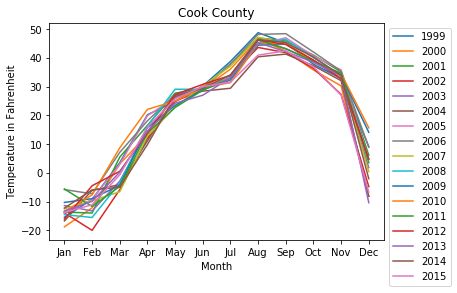

In [244]:
plot_temp_graph(Data_Cook)

#### The red line which has the lowest temperature in Feb is for the year 2002

In [251]:
Data_Cook[Data_Cook["Year"] == "2002"]

,Row_no,NAME,Date,Year,Month,count,max,mean,min,GEOID,max_F,mean_F,min_F
190,163,Cook,2002-01-01,2002,01,14,248.078140,247.646659,247.335709,17031,-13.129348,-13.906014,-14.465724
180,163,Cook,2002-02-01,2002,02,14,244.816833,244.275495,243.805389,17031,-18.999700,-19.974109,-20.820299
189,163,Cook,2002-03-01,2002,03,14,252.465591,252.140730,251.809341,17031,-5.231935,-5.816687,-6.413185
157,163,Cook,2002-04-01,2002,04,14,262.353546,262.076364,261.775696,17031,12.566383,12.067455,11.526252
168,163,Cook,2002-05-01,2002,05,14,269.424164,269.256993,269.042084,17031,25.293495,24.992587,24.605751
179,163,Cook,2002-06-01,2002,06,14,271.413849,271.385359,271.354980,17031,28.874928,28.823645,28.768965
170,163,Cook,2002-07-01,2002,07,14,274.684296,274.238665,273.814087,17031,34.761732,33.959597,33.195356
35,163,Cook,2002-08-01,2002,08,14,280.286957,279.627563,278.916748,17031,44.846522,43.659614,42.380146
47,163,Cook,2002-09-01,2002,09,14,278.912323,278.637277,278.478729,17031,42.372181,41.877098,41.591713
156,163,Cook,2002-10-01,2002,10,14,275.840088,275.600080,275.183075,17031,36.842158,36.410144,35.659535


     Row_no      NAME       Date  Year Month  count         max        mean  \
55      655  New York 1999-01-01  1999    01      4  247.323181  246.760376   
68      655  New York 1999-02-01  1999    02      4  250.481659  249.828537   
65      655  New York 1999-03-01  1999    03      4  260.448486  259.868164   
101     655  New York 1999-04-01  1999    04      4  264.678467  264.320190   
98      655  New York 1999-05-01  1999    05      4  273.454224  273.084900   

            min  GEOID      max_F     mean_F      min_F  
55   246.120316  36061 -14.488274 -15.501323 -16.653432  
68   249.154922  36061  -8.803014  -9.978633 -11.191140  
65   259.451263  36061   9.137275   8.092695   7.342274  
101  264.001617  36061  16.751240  16.106343  15.532911  
98   272.712799  36061  32.547603  31.882820  31.213038  


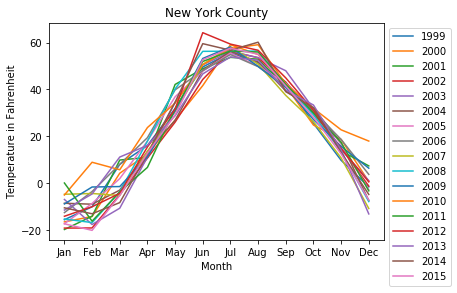

In [245]:
#To get data only for "New York" county
Data_New_York = get_county_df("New York")
Data_New_York = K_to_F(Data_New_York)
print(Data_New_York.head())
plot_temp_graph(Data_New_York)